# Домашня робота Matplotlib

## Перше завдання

Для кожної з домашніх робіт попереднього модуля Pandas додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші.

In [3]:
import numpy as np
import pandas as pd
import gdown
import os
import matplotlib.pyplot as plt

In [2]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
dfs = pd.read_html(url)
n = -1
for i, df in enumerate(dfs):
  if df.columns.tolist() == ['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']:
    n = i
    break
if n == -1:
  "Таблицю не знайдено"
else:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Регіон  28 non-null     object 
 1   1950    26 non-null     float64
 2   1960    27 non-null     float64
 3   1970    27 non-null     float64
 4   1990    28 non-null     int64  
 5   2000    28 non-null     int64  
 6   2012    28 non-null     int64  
 7   2014    28 non-null     object 
 8   2019    28 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ KB


In [6]:
for cname in df.columns.to_list()[1:]:
  if df.dtypes[cname] not in [float]:
      df[cname] = pd.to_numeric(df[cname], errors='coerce', downcast='float')
  df[cname] = df[cname].fillna(df[cname].mean(skipna=True))

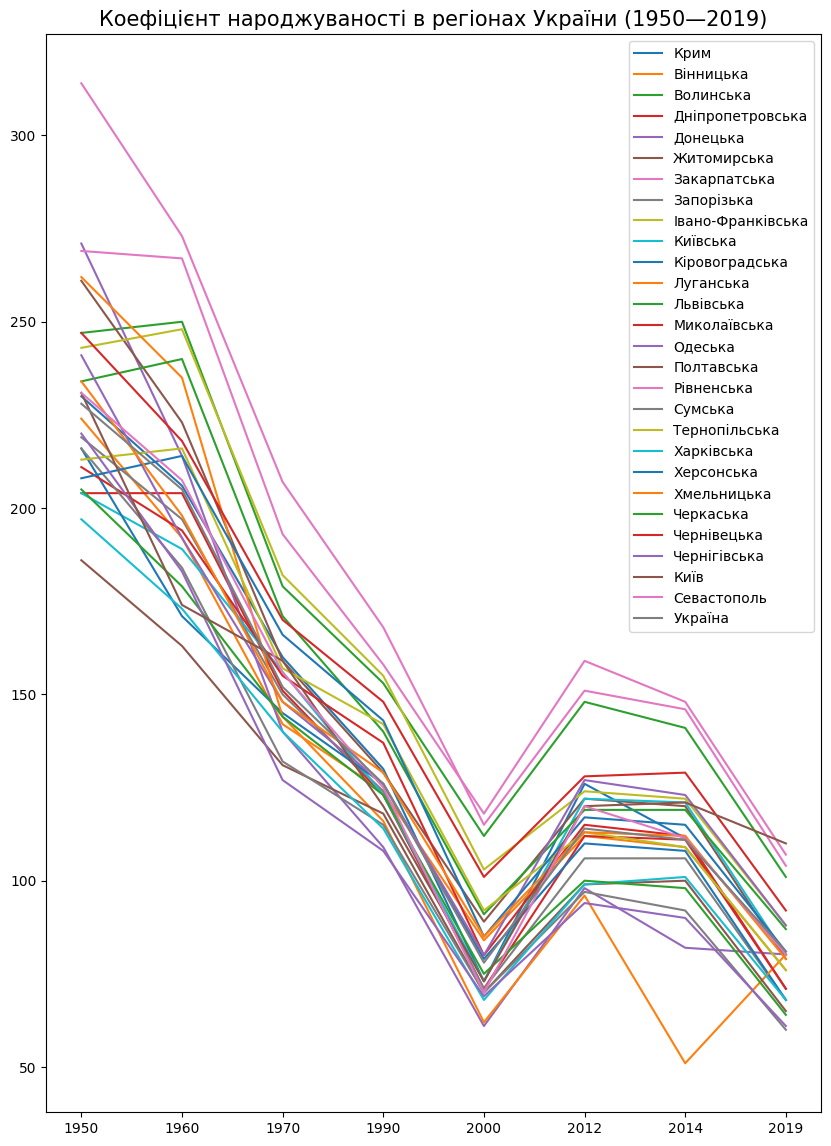

In [22]:
fig, axs = plt.subplots(figsize=(10, 14))
plt.title('Коефіцієнт народжуваності в регіонах України (1950—2019)', fontsize=15)
for i, r in df.iterrows():
  axs.plot(r[1:], label=r['Регіон'])
  #print(r['Регіон'])
plt.legend()
plt.show()



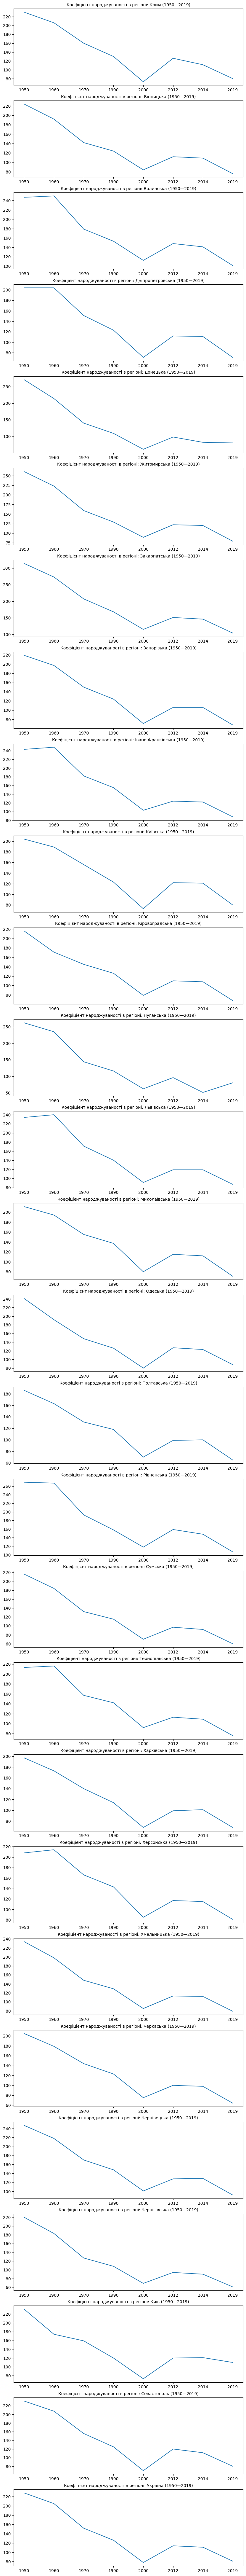

In [27]:
nr = df.shape[0]
fig, axs = plt.subplots(nr, 1, figsize=(10, 4*nr))
plt.title('Коефіцієнт народжуваності в регіонах України (1950—2019)', fontsize=15)
for i, r in df.iterrows():
  axs[i].plot(r[1:])
  axs[i].set_title(f"Коефіцієнт народжуваності в регіоні: {r['Регіон']} (1950—2019)", fontsize=10)
  #print(r['Регіон'])
plt.show()

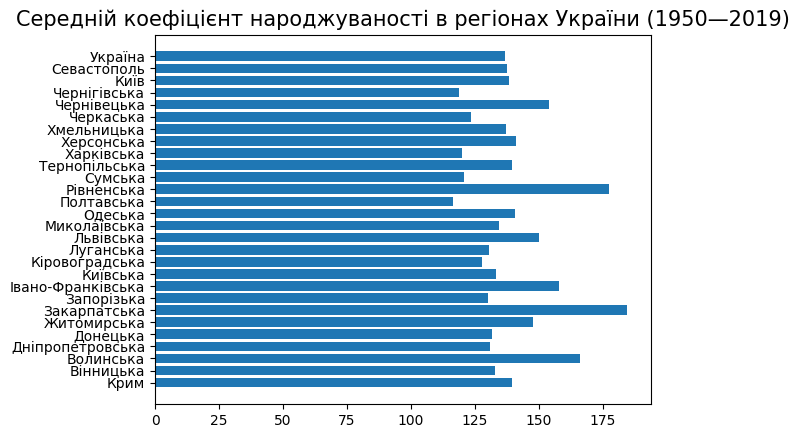

In [32]:
names = df['Регіон']
df_num = df.select_dtypes(include=np.number)
r_means = df_num.mean(axis=1)
plt.title('Середній коефіцієнт народжуваності в регіонах України (1950—2019)', fontsize=15)
plt.barh(
    names,
    r_means,
)
plt.show()

In [34]:
gdown.download(f'https://drive.google.com/uc?id=1_axik7rpXu46YlLtAGpUaoYKD6mLYP2j',
                   '2017_jun_final.csv', quiet=False)
file = '/content/2017_jun_final.csv'
if not os.path.exists(file):
  "Файл не знайдено"
else:
   df = pd.read_csv(file)
   df.info()

Downloading...
From: https://drive.google.com/uc?id=1_axik7rpXu46YlLtAGpUaoYKD6mLYP2j
To: /content/2017_jun_final.csv
100%|██████████| 3.62M/3.62M [00:00<00:00, 140MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   N                                 8704 non-null   int64  
 1   Должность                         8704 non-null   object 
 2   Язык.программирования             4854 non-null   object 
 3   Специализация                     1485 non-null   object 
 4   Общий.опыт.работы                 8704 non-null   object 
 5   Опыт.работы.на.текущем.месте      8704 non-null   object 
 6   Зарплата.в.месяц                  8704 non-null   int64  
 7   Изменение.зарплаты.за.12.месяцев  8704 non-null   int64  
 8   Город                             8704 non-null   object 
 9   Размер.компании                   8704 non-null   object 
 10  Тип.компании                      8704 non-null   object 
 11  Пол                               8704 non-null   object 
 12  Возрас

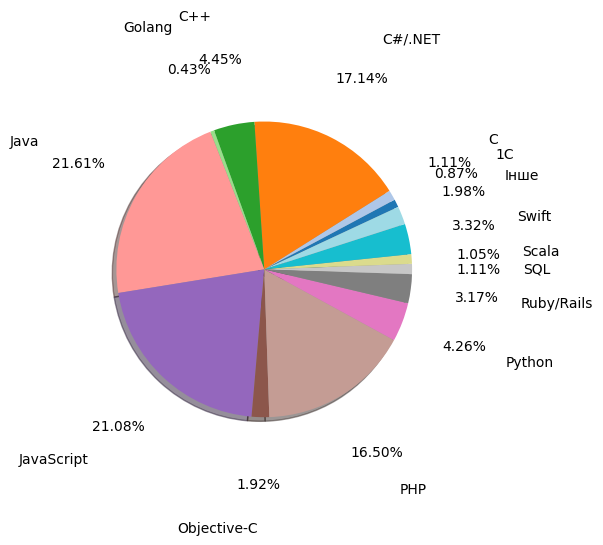

In [49]:
df_lang = df.groupby('Язык.программирования').count()

threshold = 20 # Поріг для об'єднання малих секторів

combined_c = []
combined_labels = []
other_c = 0

for i, c in enumerate(df_lang['N']):
    if c < threshold or df_lang.index[i] == 'Other':
        other_c += c
    else:
        combined_c.append(c)
        combined_labels.append(df_lang.index[i])

if other_c > 0:
    combined_c.append(other_c)
    combined_labels.append('Інше')

colors_combined = plt.cm.tab20(np.linspace(0, 1, len(combined_c)))
plt.pie(
  combined_c,
  labels=combined_labels,
  colors=colors_combined,
  shadow=True,
  autopct="%.2f%%",
  pctdistance=1.45,
  labeldistance=1.75,
  startangle=25,
)

plt.show()

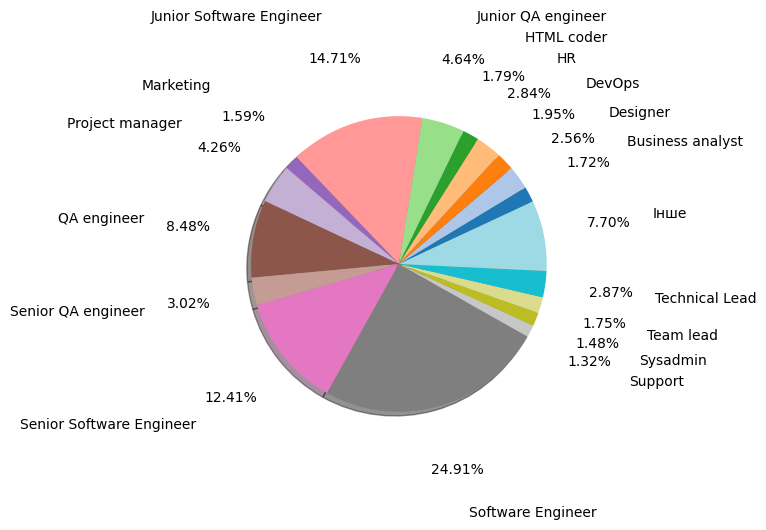

In [53]:
df_pos = df.groupby('Должность').count()

threshold = 90 # Поріг для об'єднання малих секторів

combined_c = []
combined_labels = []
other_c = 0

for i, c in enumerate(df_pos['N']):
    if c < threshold or df_pos.index[i] == 'Other':
        other_c += c
    else:
        combined_c.append(c)
        combined_labels.append(df_lang.index[i])

if other_c > 0:
    combined_c.append(other_c)
    combined_labels.append('Інше')

colors_combined = plt.cm.tab20(np.linspace(0, 1, len(combined_c)))
plt.pie(
  combined_c,
  labels=combined_labels,
  colors=colors_combined,
  shadow=True,
  autopct="%.2f%%",
  pctdistance=1.45,
  labeldistance=1.75,
  startangle=25,
)

plt.show()

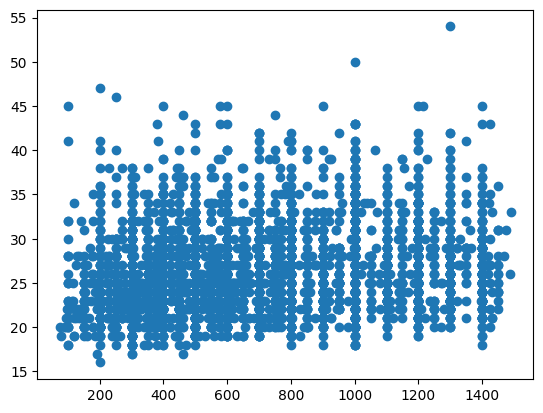

In [56]:
df_s = df[df['Зарплата.в.месяц'] < 1500]
plt.scatter(
    df_s['Зарплата.в.месяц'],
    df_s['Возраст']
)
plt.show()

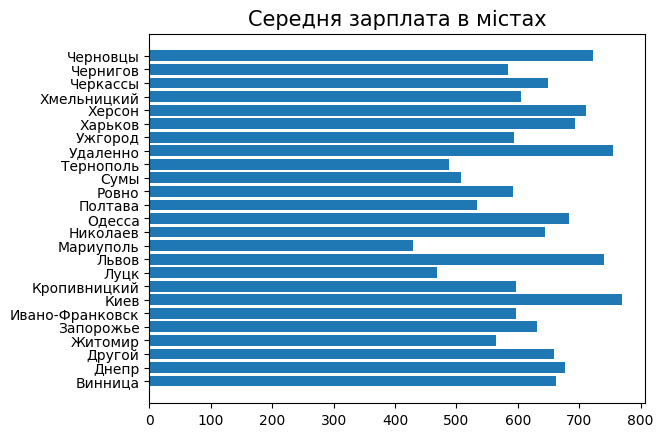

,Зарплата.в.месяц
Город,
Винница,662.484536
Днепр,677.369393
Другой,658.478723
Житомир,565.146341
Запорожье,630.934783
Ивано-Франковск,597.388889
Киев,769.237327
Кропивницкий,596.666667
Луцк,468.571429


In [70]:
df_city = df_s.groupby('Город')['Зарплата.в.месяц'].mean()
plt.title('Середня зарплата в містах', fontsize=15)
plt.barh(
    df_city.index,
    df_city,
)
plt.show()
df_city